<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/master/Project5_Team1_Ahmad_Sean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [239]:
# Common Import
import sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import random

# sklearn version > 0.20 is required 
sklearn.__version__
# Update sklearn -> !pip install -U scikit-learn

'0.22.2.post1'

#Data Scrubbing

##Loading Data

In this section, loading and viewing data are shown.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ahshawaf/AML/master/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


##Exploring Data

here, the data will be investigated to see if there is missing data and also to figure out any other issue in the data.

First, see the size of the data set.

In [4]:
len(df)

101766

Then, display the dimensionality of the data

In [8]:
df.shape

(101766, 50)

Now, info of the data is displayed.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Here is more information about data.

In [11]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Next, check the number of object types.

In [13]:
df.dtypes.value_counts()

object    37
int64     13
dtype: int64

Check is there is a null values in columns.

In [21]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

As from the above there is no null values.

Check if there is 'NaN' value in the dataframe

In [22]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

From the above, there is no 'NaN' value in dataframe.

From the sample data above, the missing data were marked as '?'. Let see in the dataframe and count them.

In [23]:
missing_data=df.isin(['?']).sum()
missing_data

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Calculate the percentage of the missing for the column that has that.

In [0]:
#Custom function to calculate the precentage of an attribute
def cal_Percentage(attributeName,missing_data=missing_data,dataFrame=df):
    print('{0}: {1:.2f} % missing data'.format(attributeName,missing_data[attributeName]/len(df)*100))

In [25]:
for att in missing_data.keys():
  if missing_data[att] > 0:
    cal_Percentage(att)

race: 2.23 % missing data
weight: 96.86 % missing data
payer_code: 39.56 % missing data
medical_specialty: 49.08 % missing data
diag_1: 0.02 % missing data
diag_2: 0.35 % missing data
diag_3: 1.40 % missing data


From the above, it shows that the follwing attributes has missing data:
1.   race 2%
2.   weight 97%
3.   payer_code 40% 
4.   medical_specialty 49%
5.   diag_1 0.02%
6.   diag_2 0.35%
7.   diag_3 1.40%

It is concluded that that there are a total of 50 columns. The breakdown is as follows:
- 2 of these columns are target variable/labels,which are 'diabetesMed and 'readmitted' and both are text features.
- 48 of these columns are features, and 35 are text features and 13 are numeric features.

##Features Engineering


Let's see the correlation of each feature using heatmap.

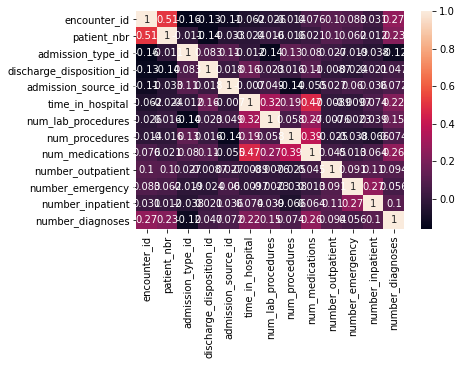

In [15]:
corr = df.corr()
sns.heatmap(corr,annot = True)

This can be seen that there aren't any high correlation greater than 0.9 between each feature. However, this doesn't mean that all features are needed to be used to create learning model, such as patient_id, physician_id, payer_id, etc. Therefore, FeatureSelector method shall kick in.

Let's drop some columnus that has value as id and missing value greater than 70%

In [20]:
data = df.drop(['encounter_id','patient_nbr','weight','admission_type_id','discharge_disposition_id',
                  'admission_source_id','payer_code','medical_specialty','number_outpatient',
                  'number_emergency','number_inpatient','diag_1','diag_2','diag_3'], axis=1)

data.shape

(101766, 36)

##Data Visualization

Display data in histgram charts to see how is the data distributed.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86615bfd0>,
      dtype=object)

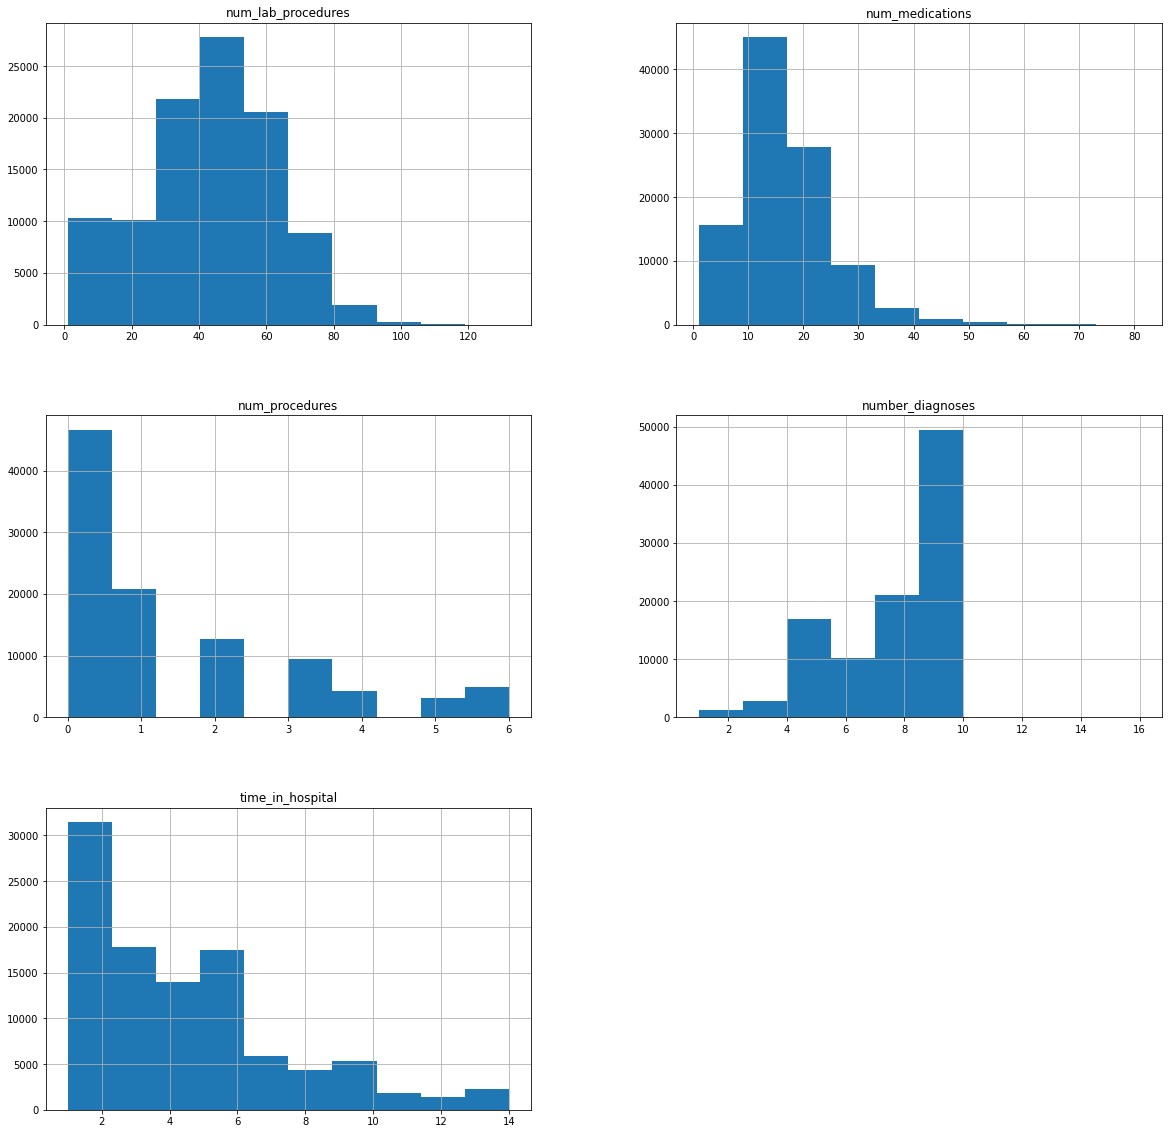

In [28]:
data.hist(figsize=(20,20))

##Group By Gender


In [275]:
count_y_genered.keys()[0]

'race'

In [0]:
def groupByChart(attr,title):

  count_y_genered=data.groupby(attr).count()
  plt.figure(figsize=(20,10))
  count = 0;

  attr=count_y_genered.keys()
  cats=count_y_genered[attr[0]].keys()
  #To assign a color for each catagory
  colors = dict()

  for cat in cats:
    random_number = random.randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    colors[cat]=hex_number
  #To assign a position for each catogory
  positions = dict()
  for key in attr:
    for cat in cats:
      positions[cat]=count_y_genered[key][cat]

  barWidth = 0.9
  for key in attr:
    for cat in cats:
      plt.bar(-0.20+count,count_y_genered[key][cat],color=colors[cat],width=barWidth)
      #plt.text(-0.20+count,positions[element]-5500,element,fontdict={'rotation':90,'color':'white','fontsize':14})
      
      count +=1
  plt.legend(cats)
  plt.xticks([(barWidth+r-0.85)*len(cats) for r in range(len(attr))],attr,rotation=90)
  plt.title(title)
  plt.show()

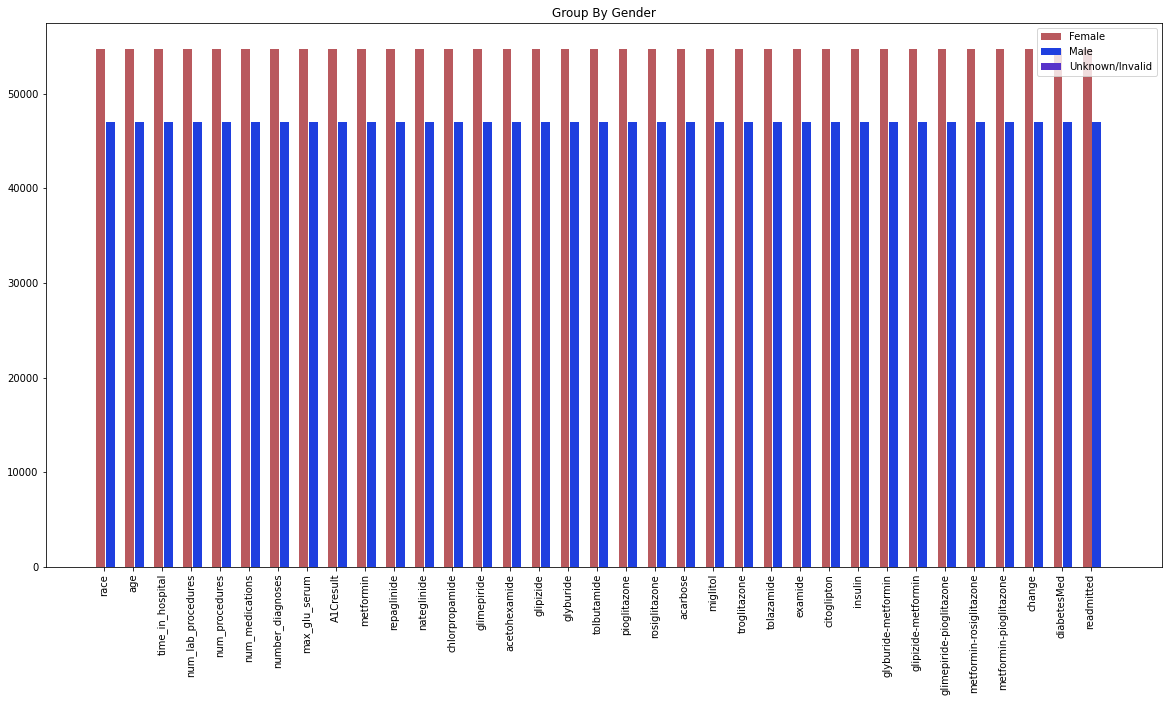

In [372]:
groupByChart('gender','Group By Gender')

##Group By Age

In [368]:
data.groupby('age').count()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[0-10),161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
[10-20),691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691
[20-30),1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
[30-40),3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775
[40-50),9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685
[50-60),17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256
[60-70),22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483
[70-80),26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068
[80-90),17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197


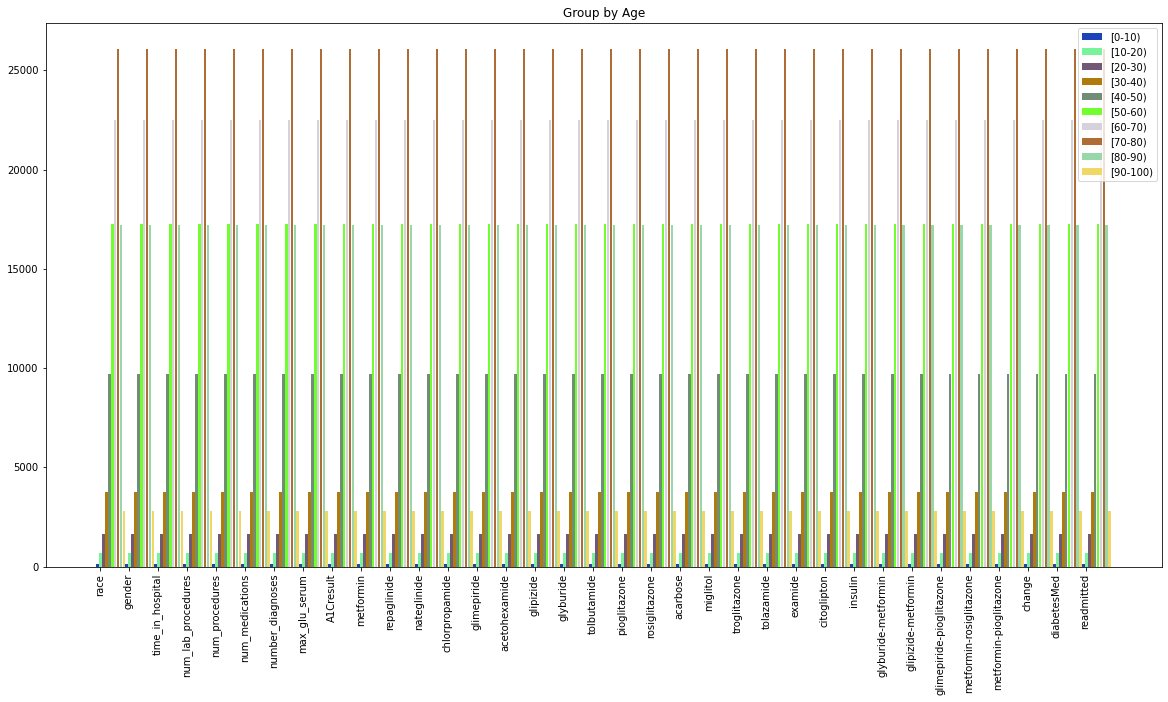

In [376]:
groupByChart('age','Group by Age')

##Group By Race


In [265]:
data.groupby('race').count()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
AfricanAmerican,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210
Asian,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641
Caucasian,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099
Hispanic,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
Other,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


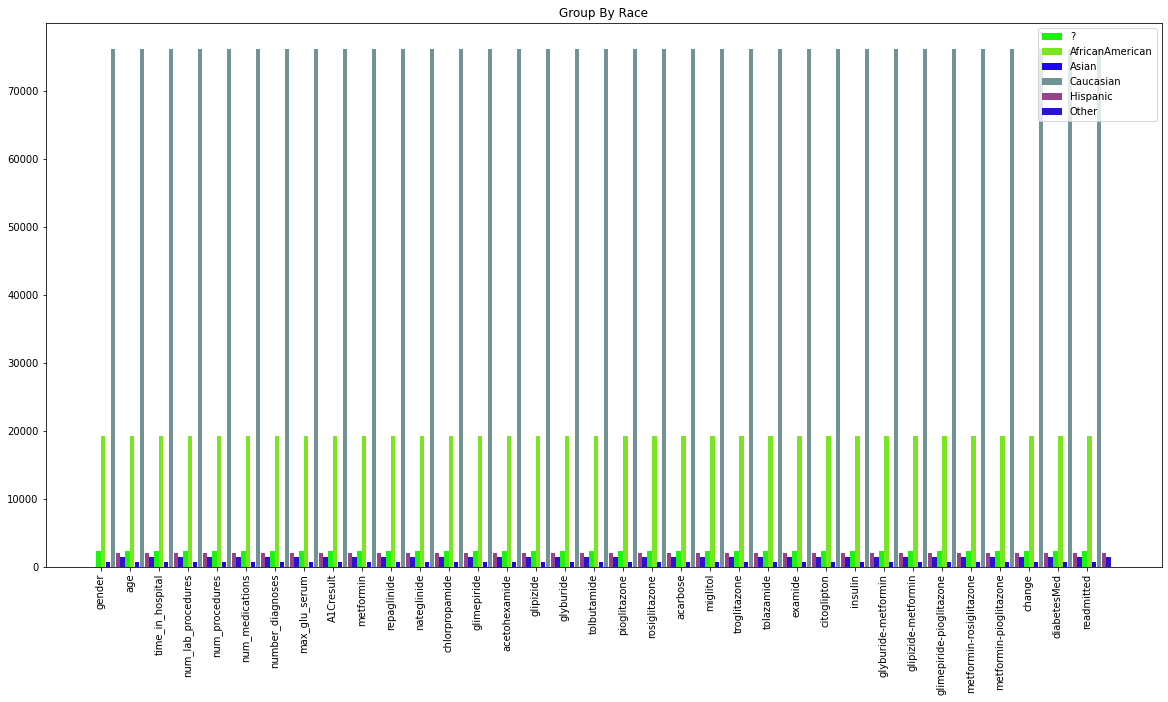

In [378]:
groupByChart('race','Group By Race')

##Group By Diabetes Medication Prescribed

In [266]:
data.groupby('diabetesMed').count()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
diabetesMed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403,23403
Yes,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363,78363


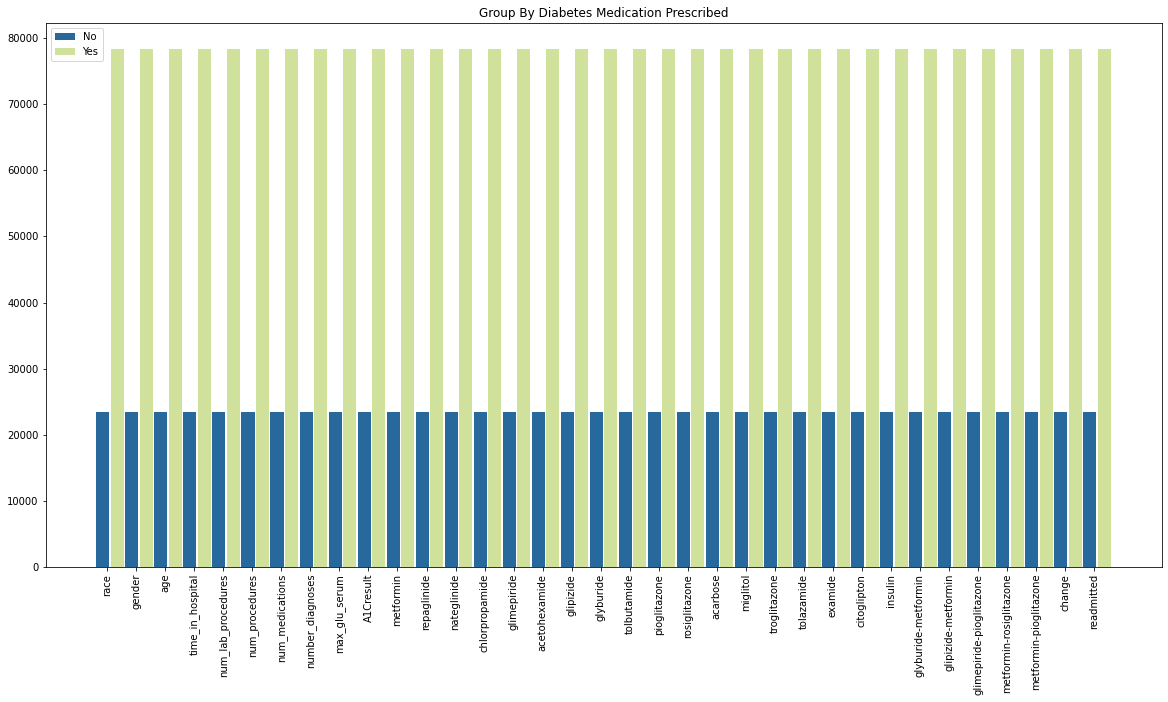

In [381]:
groupByChart('diabetesMed','Group By Diabetes Medication Prescribed')

## Group by Readmitted

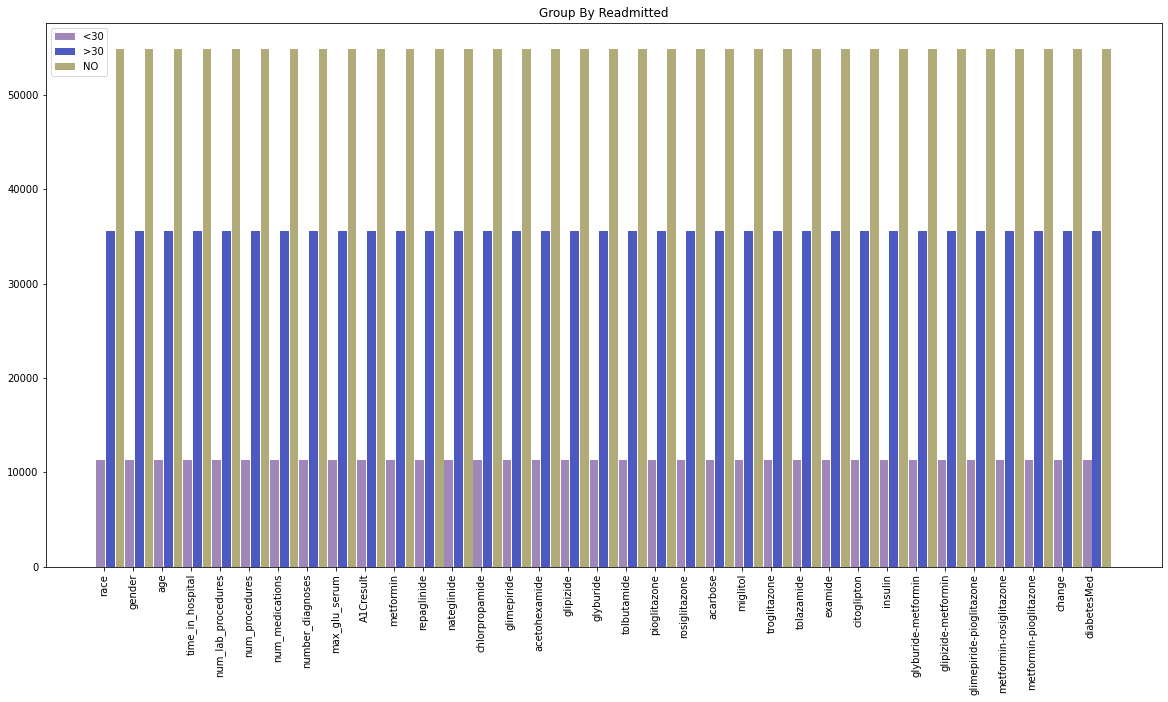

In [382]:
groupByChart('readmitted','Group By Readmitted')